In [38]:
import numpy as np
import pandas as pd
import math

In [39]:
df=pd.read_csv("PlayTennis.csv")

In [40]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [41]:
df.shape

(14, 5)

In [42]:
df.describe()

,Outlook,Temperature,Humidity,Wind,PlayTennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [43]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()    #converts the categorical variables to integers                 
df=df.apply(string_to_int.fit_transform) 
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [44]:
print(df.describe())
data_feature_cols = ['Outlook','Temperature','Humidity','Wind']
X = df[data_feature_cols ]                               
y = df.PlayTennis  


         Outlook  Temperature   Humidity       Wind  PlayTennis
count  14.000000    14.000000  14.000000  14.000000   14.000000
mean    1.071429     1.142857   0.500000   0.571429    0.642857
std     0.828742     0.864438   0.518875   0.513553    0.497245
min     0.000000     0.000000   0.000000   0.000000    0.000000
25%     0.250000     0.250000   0.000000   0.000000    0.000000
50%     1.000000     1.000000   0.500000   1.000000    1.000000
75%     2.000000     2.000000   1.000000   1.000000    1.000000
max     2.000000     2.000000   1.000000   1.000000    1.000000


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [46]:
from sklearn.tree import DecisionTreeClassifier                             
model =DecisionTreeClassifier(criterion="entropy", random_state=100)     
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [47]:
y_pred= model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [48]:
data_compared=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_compared

,Actual,Predicted
1,0,0
5,0,1
6,1,1
0,0,0
12,1,1


In [49]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  


[[2 1]
 [0 2]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [51]:
new_samples=pd.DataFrame([[2,1,0,0]])  #['Sunny', 'Hot','High','Strong']
y_pred= model.predict(new_samples) 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
print(y_pred)

[0]


In [53]:
print('Yes' if y_pred == 1 else 'No')

No


[Text(0.6, 0.9, 'Humidity <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]\nclass = No'),
 Text(0.4, 0.7, 'Outlook <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]\nclass = No'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = No'),
 Text(0.6, 0.5, 'Outlook <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = Yes'),
 Text(0.4, 0.3, 'Wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.8, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.8, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No')]

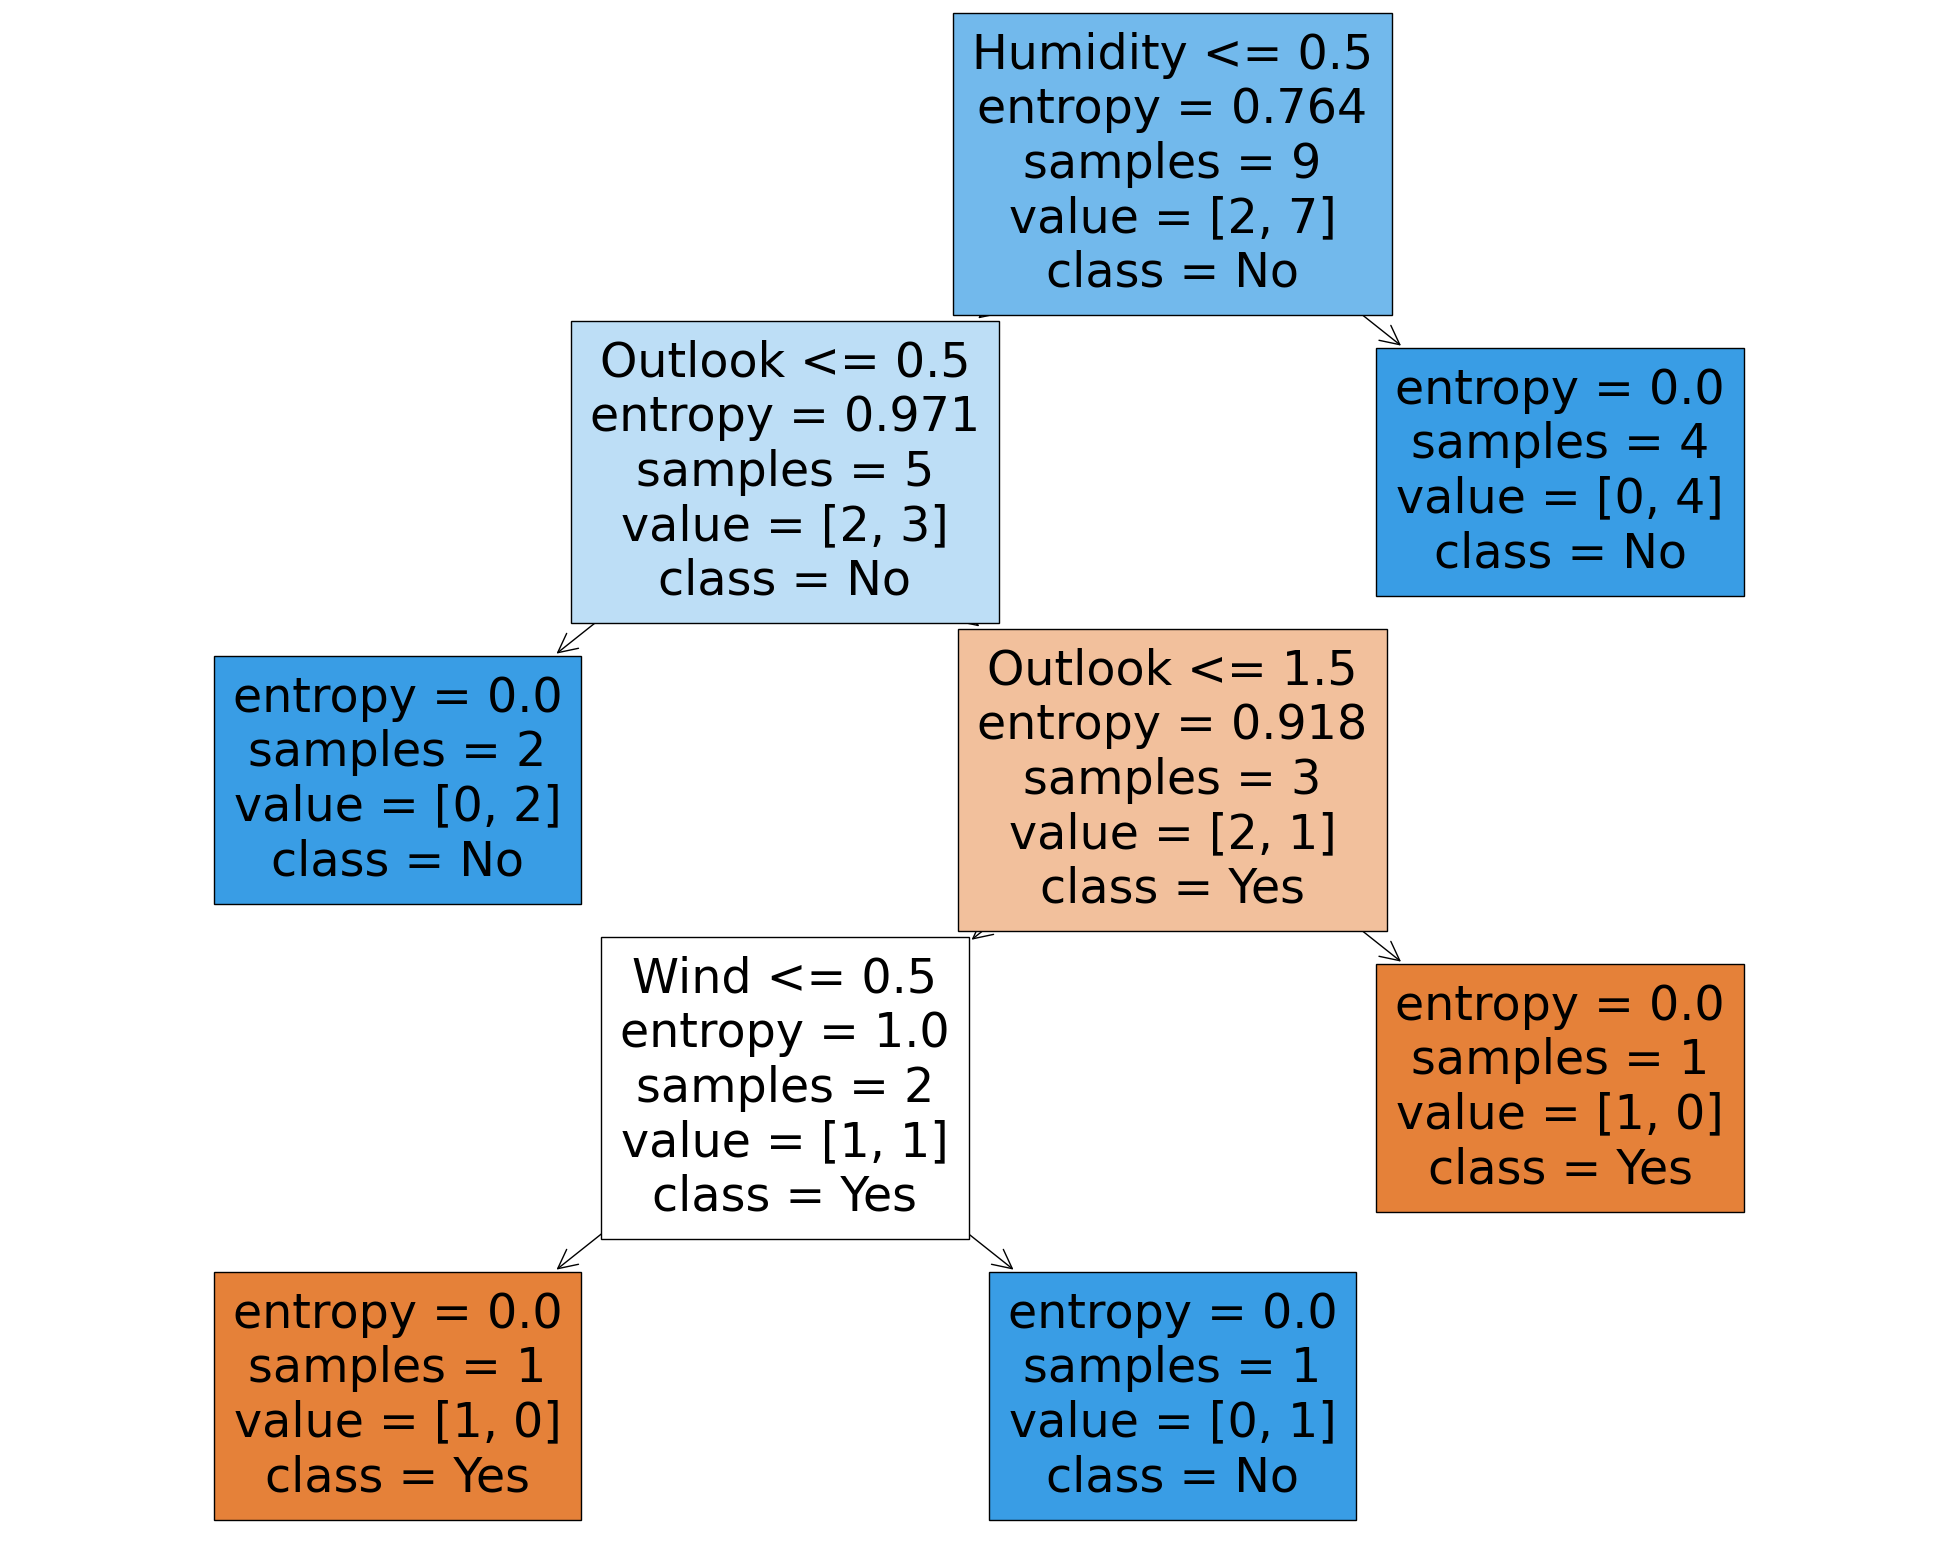

In [54]:
from sklearn import tree
from matplotlib import pyplot as plt
figure= plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=data_feature_cols,class_names=['Yes','No'],filled=True)